In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [1]:
data = pd.read_csv("sensor_data_200.txt", delimiter=" ",
    header=None, names = ("date", "time", "ir", "lidar"))

In [2]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


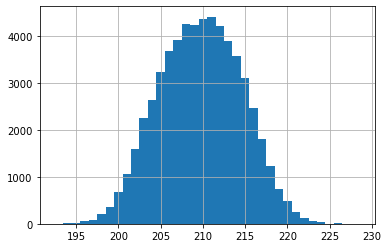

In [3]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align="left")
plt.show()

In [4]:
mean1 = sum(data["lidar"])/len(data["lidar"])
mean2 = data["lidar"].mean()
print(mean1, mean2)

209.73713297619855 209.73713297619855


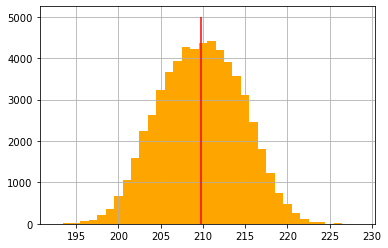

In [19]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), color="orange",align="left")
plt.vlines(mean1, ymin=0, ymax=5000, color="red")
plt.show()

In [10]:
zs = data["lidar"].values
mean = sum(zs)/len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))
unbiased_var = sum(diff_square)/(len(zs)-1)

print(sampling_var)
print(unbiased_var)

pandas_sampling_var = data["lidar"].var(ddof=0)
pandas_unbiased_var = data["lidar"].var(ddof=1)

print(pandas_sampling_var)
print(pandas_unbiased_var)

import numpy as np

numpy_default_var = np.var(data["lidar"])
numpy_unbiased_var = np.var(data["lidar"], ddof=1)

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441


In [11]:
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.83819249292072


In [5]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [6]:
freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [7]:
sum(freqs["probs"])

1.0

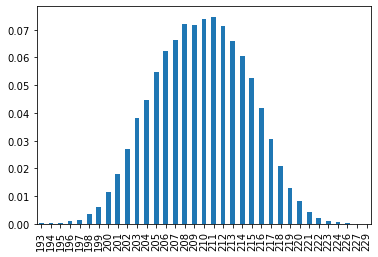

In [35]:
freqs["probs"].sort_index().plot.bar()
plt.show()

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
data_in = iris.data
data_c = iris.target

In [57]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [58]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [69]:
df = pd.read_csv('../../iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

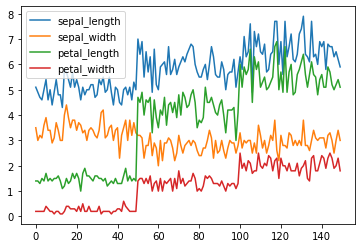

In [66]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

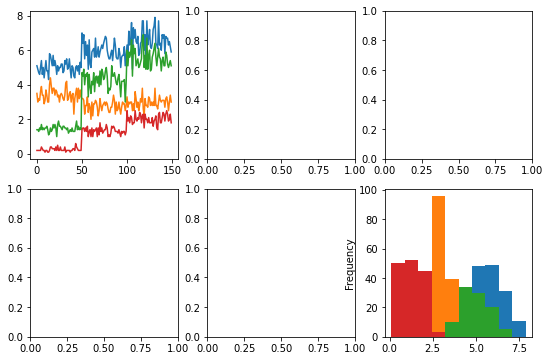

In [75]:
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
df.plot(ax=axes[0, 0], legend=False)
df.plot(ax=axes[1, 2], legend=False, kind='hist')

<AxesSubplot:>

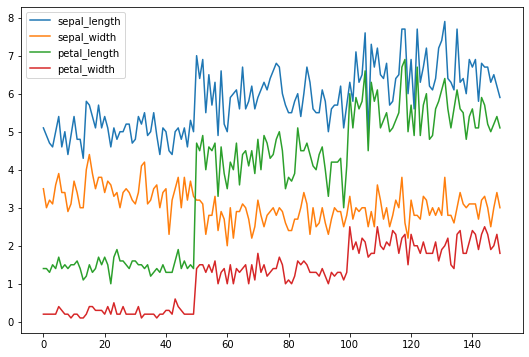

In [77]:
df.plot(figsize=(9,6))

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

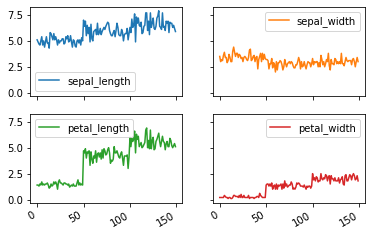

In [81]:
df.plot(subplots=True, layout=(2,2),
    sharex=True, sharey=True)

<AxesSubplot:xlabel='sepal_length'>

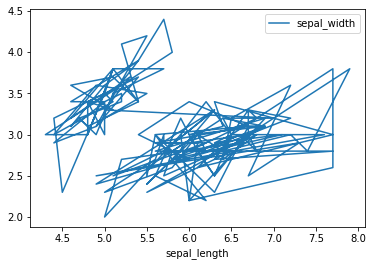

In [82]:
df.plot(x='sepal_length', y='sepal_width')

<AxesSubplot:title={'center':'Iris Data Set'}>

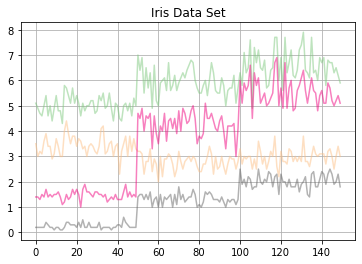

In [83]:
df.plot(title='Iris Data Set',
    grid=True,
    colormap='Accent',
    legend=False,
    alpha=0.5)

<AxesSubplot:>

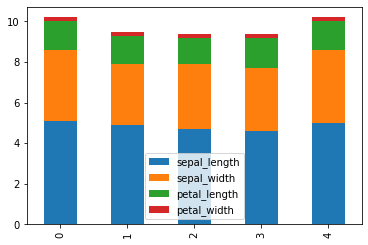

In [87]:
df[:5].plot.bar(stacked=True)

<AxesSubplot:>

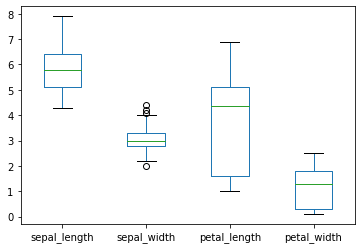

In [88]:
df.plot.box()

<AxesSubplot:ylabel='Density'>

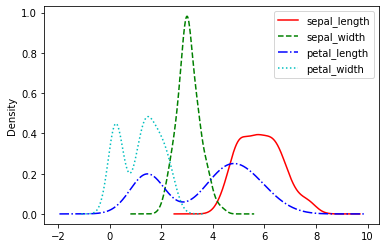

In [103]:
df.plot.kde(style=['r-', 'g--', 'b-.', 'c:'])

<AxesSubplot:>

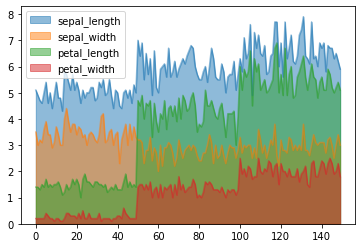

In [107]:
df.plot.area(stacked=False)

In [134]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]
drawing()

201

<AxesSubplot:>

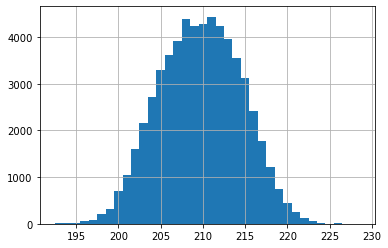

In [155]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p)-min(p), align="left")

In [5]:
def p(z, mu=209.7, dev=23.4):
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

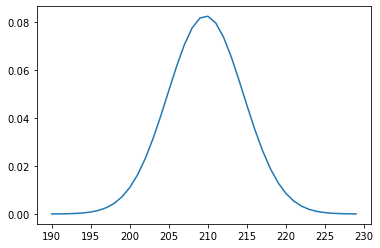

In [12]:
zs = range(190, 230)
ys = [p(z) for z in zs]

plt.plot(zs, ys)
plt.show()